In [1]:
%cd ..

c:\Users\wonde\Desktop\Projects\Speech-Notetaking\dvc_stt


In [2]:
import yaml
import pprint

with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)

pprint.pprint(config)

{'base': {'log_level': 'INFO', 'random_state': 42},
 'data': {'path': 'data/review.csv',
          'processed_path': 'data/processed.csv',
          'test_path': 'data/test.csv',
          'test_size': 0.1,
          'train_path': 'data/train.csv'},
 'evaluate': {'metrics_file': 'reports/metrics.json'},
 'train': {'model_accuracy_path': 'reports/model_accuracy.png',
           'model_checkpoint': 'model/best_model.keras',
           'model_loss_path': 'reports/model_loss.png',
           'model_parameters': {'batch_size': 64,
                                'epochs': 1,
                                'validation_split': 0.2}}}


## Prepare Data

In [3]:
from src.stages.preprocess import process

process('params.yaml')

2024-03-25 11:38:09,396 - PREPROCESS - INFO - Load raw data
2024-03-25 11:38:09,857 - PREPROCESS - INFO - Preprocess text data
2024-03-25 11:56:10,510 - PREPROCESS - INFO - Save preprocessed data


In [4]:
from src.stages.data_split import split

split('params.yaml')

2024-03-25 12:08:04,003 - DATA_SPLIT - INFO - Load processed data
2024-03-25 12:08:04,727 - DATA_SPLIT - INFO - Split processed data into train and test sets
2024-03-25 12:08:04,752 - DATA_SPLIT - INFO - Save train and test sets


### **Train Model**

2024-03-25 12:08:12,396 - TRAIN - INFO - Load train dataset
2024-03-25 12:08:18,938 - TRAIN - INFO - Train model


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Embedding)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout1 (Dropout)              │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GRU (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout2 (Dropout)              │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense4 (Dense)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

619/619 ━━━━━━━━━━━━━━━━━━━━ 418s 664ms/step - accuracy: 0.8770 - loss: 0.3745 - val_accuracy: 0.8854 - val_loss: 0.3667
2024-03-25 12:15:17,262 - TRAIN - INFO - Save model accuracy plot
2024-03-25 12:15:17,458 - TRAIN - INFO - Model accuracy plot saved to : {config['train']['model_accuracy_path']}
2024-03-25 12:15:17,460 - TRAIN - INFO - Save model accuracy plot
2024-03-25 12:15:17,566 - TRAIN - INFO - Accuracy metrics file saved to : {config['train']['model_loss_path']}


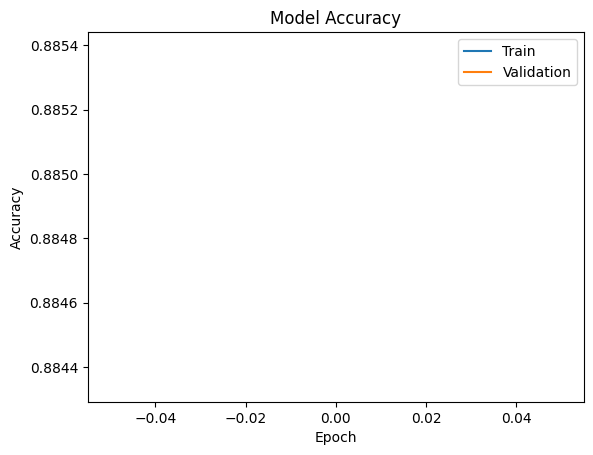

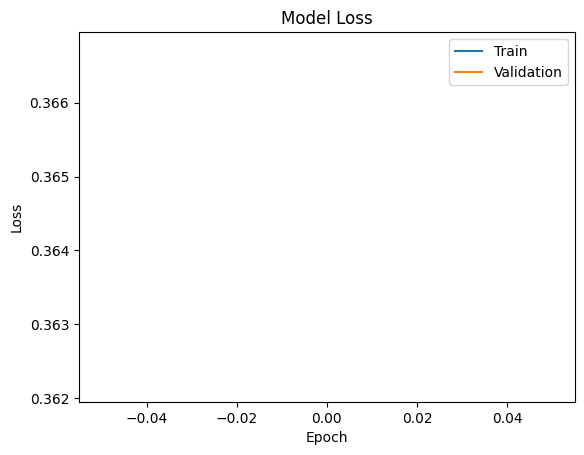

In [5]:
from src.stages.train import train

train('params.yaml')

### **Evaluate Model**

In [6]:
from src.stages.evaluate import evaluate

evaluate('params.yaml')

2024-03-25 12:15:18,132 - EVALUATE - INFO - Load train dataset


2024-03-25 12:15:19,255 - EVALUATE - INFO - Load test dataset
2024-03-25 12:15:24,426 - EVALUATE - INFO - Load model
2024-03-25 12:15:25,956 - EVALUATE - INFO - Evaluate model
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.8845 - loss: 0.3682
2024-03-25 12:15:47,008 - EVALUATE - INFO - Save metrics
2024-03-25 12:15:47,011 - EVALUATE - INFO - Accuracy metrics file saved to : {config['evaluate']['metrics_file']}
